# Projek : **Analisis Sentimen pada Ulasan Aplikasi Dana di Google Play Store**
- **Nama:** Insania Cindy Puan Fadilahsari
- **Email:** insaniacindy12312@gmail.com
- **ID Dicoding:** insanniaa
- **Cohort ID:** MC006D5X1384
- **Coding Camp Email Username:** mc006d5x1384@student.devacademy.id

# Import Library

In [ ]:
!pip install pipreqs

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks/projekdicoding/proyek_analisis_sentimen" --scan-notebooks

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)

import matplotlib.pyplot as plt
import datetime as dt
import re
import string
import csv
import requests
from io import StringIO

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

!pip install gensim
from gensim.models import Word2Vec

!pip install wordcloud
from wordcloud import WordCloud

!pip install sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import nltk
nltk.download('all')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 7.0 MB/s eta 0:00:00


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

# Loading Dataset

In [ ]:
dana_reviews_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/projekdicoding/proyek_analisis_sentimen/ulasan_aplikasi_dana.csv')

In [ ]:
dana_reviews_df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,153f3239-8864-4b70-94c2-f87e2613c8cf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Bagus, UI nya cukup mudah dipahami, saran: 1. ...",5,1598,2.71.1,2025-02-14 09:56:28,NaN,NaN,2.71.1
1,65683514-6499-4943-85ad-1ee201cd384b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi yang sangat mudah pemakaiannya dan sa...,5,295,2.72.0,2025-03-05 13:24:50,NaN,NaN,2.72.0
2,3b8feda9-cfe9-43fb-b6e4-00c5f60d1fa9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Emang aplikasi BUSUK.Saya transaksi sudah terj...,1,206,2.74.0,2025-02-28 22:10:26,"Hi Kak, maaf buat khawatir. Terkait keluhan td...",2024-05-06 09:16:14,2.74.0
3,ffa0a87a-eefd-456a-a59f-a35628e4c36e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasinya bagus, tampilannya juga keren, ter...",5,696,2.74.0,2025-03-01 07:21:10,NaN,NaN,2.74.0
4,1c5aff9a-275c-46b5-bb53-0a4cf1846f65,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Saat di refresh kok lemot sudah di update yang...,2,142,2.74.0,2025-02-20 05:35:14,NaN,NaN,2.74.0


In [ ]:
dana_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121500 entries, 0 to 121499
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              121500 non-null  object
 1   userName              121500 non-null  object
 2   userImage             121500 non-null  object
 3   content               121500 non-null  object
 4   score                 121500 non-null  int64 
 5   thumbsUpCount         121500 non-null  int64 
 6   reviewCreatedVersion  100990 non-null  object
 7   at                    121500 non-null  object
 8   replyContent          89413 non-null   object
 9   repliedAt             89413 non-null   object
 10  appVersion            100990 non-null  object
dtypes: int64(2), object(9)
memory usage: 10.2+ MB


Dapat diketahui bahwa dataset hasil scraping terdiri dari 11 kolom dan 121500 baris.

In [ ]:
#menghapus missing values
df = dana_reviews_df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71590 entries, 2 to 121499
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              71590 non-null  object
 1   userName              71590 non-null  object
 2   userImage             71590 non-null  object
 3   content               71590 non-null  object
 4   score                 71590 non-null  int64 
 5   thumbsUpCount         71590 non-null  int64 
 6   reviewCreatedVersion  71590 non-null  object
 7   at                    71590 non-null  object
 8   replyContent          71590 non-null  object
 9   repliedAt             71590 non-null  object
 10  appVersion            71590 non-null  object
dtypes: int64(2), object(9)
memory usage: 6.6+ MB


In [ ]:
#memeriksa apakah terdapat data duplikat
df.duplicated().sum()

0

Berdasarkan hasil tersebut, dapat diketahui bahwa tidak terdapat data duplikat yang ditemukan.

# Preprocessing Data

In [ ]:
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) #menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) #menghapus RT
    text = re.sub(r"http\S+", '', text) #menghapus link
    text = re.sub(r'[0-9]+', '', text) #menghapus angka
    text = re.sub(r'[^\w\s]', '', text) #menghapus karakter selain huruf dan angka

    text = text.replace('\n', ' ') #mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) #menghapus semua tanda baca
    text = text.strip(' ') #menghapus karakter spasi dari kiri dan kanan teks
    return text

def casefoldingText(text): #mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): #memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): #menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa", "gk","loh","kah","woi","woii","woy", "yang", "yg"])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): #mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    #membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    #memecah teks menjadi daftar kata
    words = text.split()

    #menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    #menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): #mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [ ]:
#mengidentifikasi slangwords
slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar",
    "bgt": "banget", "maks": "maksimal", "gak": "tidak", "ga": "tidak", "tp": "tapi",
    "sbnrnya": "sebenarnya", "tdk": "tidak", "trs": "terus", "blm": "belum", "lg": "lagi",
    "krn": "karena", "kmrn": "kemarin", "td": "tadi", "sm": "sama", "sy": "saya",
    "gw": "saya", "lu": "kamu", "u": "kamu", "pd": "pada", "jg": "juga", "dkt": "dekat",
    "brp": "berapa", "mlm": "malam", "malem": "malam", "dgn": "dengan", "jgk": "juga", "aj": "aja",
    "mo": "mau", "msh": "masih", "km": "kamu", "gw": "saya", "doi": "dia"}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [ ]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df['text_clean'] = df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df['text_akhir'] = df['text_stopword'].apply(toSentence)

In [ ]:
df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
2,3b8feda9-cfe9-43fb-b6e4-00c5f60d1fa9,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Emang aplikasi BUSUK.Saya transaksi sudah terj...,1,206,2.74.0,2025-02-28 22:10:26,"Hi Kak, maaf buat khawatir. Terkait keluhan td...",2024-05-06 09:16:14,2.74.0,Emang aplikasi BUSUKSaya transaksi sudah terja...,emang aplikasi busuksaya transaksi sudah terja...,emang aplikasi busuksaya transaksi sudah terja...,"[emang, aplikasi, busuksaya, transaksi, sudah,...","[emang, aplikasi, busuksaya, transaksi, berhas...",emang aplikasi busuksaya transaksi berhasil bu...
5,833569be-6ca8-4017-a773-169626a0e296,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tutup akun aja kayak nagih hutang, sulit, yg a...",1,702,2.74.0,2025-02-14 22:21:28,"Hi Kak, kami sedih lho kalau kamu ngga gunain ...",2025-02-24 06:48:21,2.74.0,Tutup akun aja kayak nagih hutang sulit yg ada...,tutup akun aja kayak nagih hutang sulit yg ada...,tutup akun aja kayak nagih hutang sulit yg ada...,"[tutup, akun, aja, kayak, nagih, hutang, sulit...","[tutup, akun, aja, kayak, nagih, hutang, sulit...",tutup akun aja kayak nagih hutang sulit kendal...
6,d368346d-2ce9-4671-82dd-801b19e2929e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Aplikasi rawan penipuan, terpaksa UNISTAL kare...",1,412,2.74.0,2025-02-23 13:08:12,"Hi Kak, kami paham apa yg Kakak rasakan. Terka...",2025-03-04 09:30:33,2.74.0,Aplikasi rawan penipuan terpaksa UNISTAL karen...,aplikasi rawan penipuan terpaksa unistal karen...,aplikasi rawan penipuan terpaksa unistal karen...,"[aplikasi, rawan, penipuan, terpaksa, unistal,...","[aplikasi, rawan, penipuan, terpaksa, unistal,...",aplikasi rawan penipuan terpaksa unistal saldo...
8,75955983-2161-457b-b8cb-878a2bbd9a4b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Setelah di update * Tidak bisa buka' riwayat t...,5,2344,2.74.0,2025-02-15 21:29:38,"Hi Kak, maaf udah bikin kamu ga tenang. Terkai...",2025-02-24 14:41:02,2.74.0,Setelah di update Tidak bisa buka riwayat tra...,setelah di update tidak bisa buka riwayat tra...,setelah di update tidak bisa buka riwayat tran...,"[setelah, di, update, tidak, bisa, buka, riway...","[update, buka, riwayat, transaksi, personal, k...",update buka riwayat transaksi personal kirim b...
9,fbba60bc-0132-4e72-8a85-073b970d8cff,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Saya ingin berhenti menggunakan DANA, tapi unt...",1,223,2.74.0,2025-02-19 01:34:04,"Hi Kak, maaf udah bikin kamu ga tenang. Terkai...",2025-02-27 08:38:31,2.74.0,Saya ingin berhenti menggunakan DANA tapi untu...,saya ingin berhenti menggunakan dana tapi untu...,saya ingin berhenti menggunakan dana tapi untu...,"[saya, ingin, berhenti, menggunakan, dana, tap...","[berhenti, dana, menghapus, akun, betulbetul, ...",berhenti dana menghapus akun betulbetul dipers...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121490,b58c73b2-f0a7-48e0-96cc-1e6b4b698a76,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong diperbaiki masalah mau masuk akun,masak...",1,1,2.56.2,2024-05-19 17:16:59,"Hi Kak, jangan khawatir ya. Untuk keluhan logi...",2024-05-20 02:18:26,2.56.2,Tolong diperbaiki masalah mau masuk akunmasak ...,tolong diperbaiki masalah mau masuk akunmasak ...,tolong diperbaiki masalah mau masuk akunmasak ...,"[tolong, diperbaiki, masalah, mau, masuk, akun...","[tolong, diperbaiki, masuk, akunmasak, udah, s...",tolong diperbaiki masuk akunmasak udah scan wa...
121493,68d473d9-e28e-4da1-bcbc-4d4cacbc1cff,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Udah di upger ke premium malah lama nunggu pro...,1,0,2.35.0,2024-03-08 12:29:47,"Hi Kak, maaf sudah bikin kamu gak nyaman, terk...",2024-03-08 12:36:45,2.35.0,Udah di upger 

# Pelabelan

In [ ]:
# Membaca data kamus kata-kata positif dari GitHub
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_positive[row[0]] = int(row[1])
        # Menambahkan kata-kata positif dan skornya ke dalam kamus lexicon_positive
else:
    print("Failed to fetch positive lexicon data")

# Membaca data kamus kata-kata negatif dari GitHub
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
# Mengirim permintaan HTTP untuk mendapatkan file CSV dari GitHub

if response.status_code == 200:
    # Jika permintaan berhasil
    reader = csv.reader(StringIO(response.text), delimiter=',')
    # Membaca teks respons sebagai file CSV menggunakan pembaca CSV dengan pemisah koma

    for row in reader:
        # Mengulangi setiap baris dalam file CSV
        lexicon_negative[row[0]] = int(row[1])
        # Menambahkan kata-kata negatif dan skornya dalam kamus lexicon_negative
else:
    print("Failed to fetch negative lexicon data")

In [ ]:
#menentukan polaritas sentimen
def sentiment_analysis_lexicon_indonesia(text):
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word] #jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word] #jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''

    if (score > 0):
        polarity = 'positive' #jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative' #jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'

    return score, polarity

In [ ]:
results = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
df['polarity_score'], df['polarity'] = zip(*results)

print(df['polarity'].value_counts())

polarity
positive    35970
negative    31457
neutral      4163
Name: count, dtype: int64


# Ekstraksi Fitur

## TF-IDF

Pada tahap ekstraksi fitur TF-IDF, saya menggunakan jumlah fitur 10000 dan menerapkan unigram, bigram, serta trigram. Selain itu, disini saya juga menerapkan SMOTE untuk menangani data sentimen yang tidak seimbang.

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE

#memisahkan data menjadi fitur dan label (sentimen)
X = df['text_akhir']
y = df['polarity']

#ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=10000, min_df=5, max_df=0.9 )
X_tfidf = tfidf.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_tfidf, y)

#membagi data 80:20
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#membagi data 70:30
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

## Word2Vec

In [ ]:
sentences = df['text_akhir'].apply(word_tokenize).tolist()

#melatih word2vec
w2v_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

In [ ]:
def get_vector(sentence, model, vector_size):
    words = word_tokenize(sentence)
    word_vectors = [model.wv[word] for word in words if word in model.wv]

    if len(word_vectors) == 0:
        return np.zeros(vector_size)  #jika tidak ada kata yang cocok, nanti mengembalikan vektor nol
    else:
        return np.mean(word_vectors, axis=0)  #rata-rata vektor dari semua kata

#mengonversi menjadi vektor
X_vectors = np.array([get_vector(text, w2v_model, 100) for text in df['text_akhir']])

y3 = df['polarity']

#split data 80:20
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_vectors, y3, test_size=0.2, random_state=42)

# Pemodelan

Pada tahap pemodelan, saya mencoba menggunakan berbagai skema pelatihan. Skema ini saya bedakan dari variasi algoritma pelatihan (SVM, Random Forest, dan Logistic Regression), metode ekstraksi fitur (TF-IDF dan Word2Vec)< dan pembagian data (80:20 dan 70:30).

## Menggunakan Ekstraksi Fitur TF-IDF

### Random Forest -> 80:20

In [ ]:
#membangun model
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

#melatih model
random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

#evaluasi perfrma model
accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy_train:', accuracy_train_rf)
print('Random Forest - accuracy_test:', accuracy_test_rf)

Random Forest - accuracy_train: 1.0
Random Forest - accuracy_test: 0.8883792048929664


Pemodelan dilakukan dengan menggunakan ekstraksi fitur TF-IDF dan algoritma Random Forest. Data dibagi dengan rasio 80:20 untuk data latih dan data uji. Hasil evaluasi menunjukkan bahwa model mencapai akurasi sebesar 100% pada data latih dan 88.83% pada data uji, yang menunjukkan kinerja yang baik dalam mengklasifikasikan sentimen.

### SVM -> 80:20

In [ ]:
#membangun model
svm_model = LinearSVC()

#melatih model
svm_model.fit(X_train, y_train)

y_pred_train_svm = svm_model.predict(X_train)
y_pred_test_svm = svm_model.predict(X_test)

#evaluasi performa model
accuracy_train_svm = accuracy_score(y_train, y_pred_train_svm)
accuracy_test_svm = accuracy_score(y_test, y_pred_test_svm)

print('SVM - accuracy_train:', accuracy_train_svm)
print('SVM - accuracy_test:', accuracy_test_svm)

SVM - accuracy_train: 0.9687818552497451
SVM - accuracy_test: 0.9276712074877212


Pemodelan dilakukan dengan menggunakan ekstraksi fitur TF-IDF dan algoritma SVM. Data dibagi dengan rasio 80:20 untuk data latih dan data uji. Hasil evaluasi menunjukkan bahwa model mencapai akurasi sebesar 96.87% pada data latih dan 92.76% pada data uji, yang menunjukkan kinerja yang baik dalam mengklasifikasikan sentimen.

### Logistic Regression -> 80:20

In [ ]:
#membangun model
logistic_regression = LogisticRegression()

#melatih model
logistic_regression.fit(X_train.toarray(), y_train)

y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

#evaluasi performa model
accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)
accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

print('Logistic Regression - accuracy_train:', accuracy_train_lr)
print('Logistic Regression - accuracy_test:', accuracy_test_lr)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - accuracy_train: 0.9322815309053841
Logistic Regression - accuracy_test: 0.9007969604299879


Pemodelan dilakukan dengan menggunakan ekstraksi fitur TF-IDF dan algoritma Logistic Regression. Data dibagi dengan rasio 80:20 untuk data latih dan data uji. Hasil evaluasi menunjukkan bahwa model mencapai akurasi sebesar 93.22% pada data latih dan 90.07% pada data uji, yang menunjukkan kinerja yang baik dalam mengklasifikasikan sentimen.

### Random Forest -> 70:30

In [ ]:
#membangun model
random_forest2 = RandomForestClassifier(n_estimators=100, random_state=42)

#melatih model
random_forest2.fit(X_train2.toarray(), y_train2)

y_pred_train_rf2 = random_forest2.predict(X_train2.toarray())
y_pred_test_rf2 = random_forest2.predict(X_test2.toarray())

#evaluasi perfrma model
accuracy_train_rf2 = accuracy_score(y_pred_train_rf2, y_train2)
accuracy_test_rf2 = accuracy_score(y_pred_test_rf2, y_test2)

print('Random Forest - accuracy_train:', accuracy_train_rf2)
print('Random Forest - accuracy_test:', accuracy_test_rf2)

Random Forest - accuracy_train: 1.0
Random Forest - accuracy_test: 0.8829271306335527


Pemodelan dilakukan dengan menggunakan ekstraksi fitur TF-IDF dan algoritma Random Forest. Data dibagi dengan rasio 70:30 untuk data latih dan data uji. Hasil evaluasi menunjukkan bahwa model mencapai akurasi sebesar 100% pada data latih dan 88.29% pada data uji, yang menunjukkan kinerja yang baik dalam mengklasifikasikan sentimen.

### SVM -> 70:30

In [ ]:
#membangun model
svm_model2 = LinearSVC()

#melatih model
svm_model2.fit(X_train2, y_train2)

y_pred_train_svm2 = svm_model2.predict(X_train2)
y_pred_test_svm2 = svm_model2.predict(X_test2)

#evaluasi performa model
accuracy_train_svm2 = accuracy_score(y_train2, y_pred_train_svm2)
accuracy_test_svm2 = accuracy_score(y_test2, y_pred_test_svm2)

print('SVM - accuracy_train:', accuracy_train_svm2)
print('SVM - accuracy_test:', accuracy_test_svm2)

SVM - accuracy_train: 0.9687967486132624
SVM - accuracy_test: 0.9262039353782473


Pemodelan dilakukan dengan menggunakan ekstraksi fitur TF-IDF dan algoritma SVM. Data dibagi dengan rasio 70:30 untuk data latih dan data uji. Hasil evaluasi menunjukkan bahwa model mencapai akurasi sebesar 96.87% pada data latih dan 92.62% pada data uji, yang menunjukkan kinerja yang baik dalam mengklasifikasikan sentimen.

### Logistic Regression -> 70:30

In [ ]:
#membangun model
logistic_regression2 = LogisticRegression()

#melatih model
logistic_regression2.fit(X_train2.toarray(), y_train2)

y_pred_train_lr2 = logistic_regression2.predict(X_train2.toarray())
y_pred_test_lr2 = logistic_regression2.predict(X_test2.toarray())

#evaluasi performa model
accuracy_train_lr2 = accuracy_score(y_pred_train_lr2, y_train2)
accuracy_test_lr2 = accuracy_score(y_pred_test_lr2, y_test2)

print('Logistic Regression - accuracy_train:', accuracy_train_lr2)
print('Logistic Regression - accuracy_test:', accuracy_test_lr2)

Logistic Regression - accuracy_train: 0.9319935925440512
Logistic Regression - accuracy_test: 0.8982176505112285


Pemodelan dilakukan dengan menggunakan ekstraksi fitur TF-IDF dan algoritma Logistic Regression. Data dibagi dengan rasio 70:30 untuk data latih dan data uji. Hasil evaluasi menunjukkan bahwa model mencapai akurasi sebesar 93.19% pada data latih dan 89.82% pada data uji, yang menunjukkan kinerja yang baik dalam mengklasifikasikan sentimen.

## Menggunakan Ekstraksi Fitur Word2Vec

### SVM

In [ ]:
#membangun model
svm_model3 = LinearSVC()

#melatih model
svm_model3.fit(X_train3, y_train3)

y_pred_train_svm3 = svm_model3.predict(X_train3)
y_pred_test_svm3 = svm_model3.predict(X_test3)

#evaluasi performa model
accuracy_train_svm3 = accuracy_score(y_train3, y_pred_train_svm3)
accuracy_test_svm3 = accuracy_score(y_test3, y_pred_test_svm3)

print('SVM - accuracy_train:', accuracy_train_svm3)
print('SVM - accuracy_test:', accuracy_test_svm3)

SVM - accuracy_train: 0.7704113703031149
SVM - accuracy_test: 0.7728733063276993


Pemodelan dilakukan dengan menggunakan ekstraksi fitur Word2Vec dan algoritma SVM. Dalam proses ini, data dibagi dengan rasio 80:20 untuk data latih dan data uji. Hasil evaluasi menunjukkan bahwa model SVM mencapai akurasi sebesar 77,04% pada data latih dan 77,28% pada data uji.

### Random Forest

In [ ]:
#membangun model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

#melatih model
rf_model.fit(X_train3, y_train3)

y_pred_train_rf3 = rf_model.predict(X_train3)
y_pred_test_rf3 = rf_model.predict(X_test3)

#evaluasi performa model
accuracy_train_rf3 = accuracy_score(y_train3, y_pred_train_rf3)
accuracy_test_rf3 = accuracy_score(y_test3, y_pred_test_rf3)

print("Random Forest - accuracy_train:", accuracy_train_rf3)
print("Random Forest - accuracy_test:", accuracy_test_rf3)

Random Forest - accuracy_train: 0.9999825394608185
Random Forest - accuracy_test: 0.7258695348512362


Pemodelan dilakukan dengan menggunakan ekstraksi fitur Word2Vec dan algoritma Random Forest. Dalam proses ini, data dibagi dengan rasio 80:20 untuk data latih dan data uji. Hasil evaluasi menunjukkan bahwa model SVM mencapai akurasi sebesar 99,99% pada data latih dan 72,58% pada data uji.

### Logistic Regression

In [ ]:
#membangun model
logistic_regression3 = LogisticRegression()

#melatih model
logistic_regression3.fit(X_train3, y_train3)

y_pred_train_lr3 = logistic_regression3.predict(X_train3)
y_pred_test_lr3 = logistic_regression3.predict(X_test3)

#evaluasi performa model
accuracy_train_lr3 = accuracy_score(y_pred_train_lr3, y_train3)
accuracy_test_lr3 = accuracy_score(y_pred_test_lr3, y_test3)

print('Logistic Regression - accuracy_train:', accuracy_train_lr3)
print('Logistic Regression - accuracy_test:', accuracy_test_lr3)

Logistic Regression - accuracy_train: 0.7635842994831681
Logistic Regression - accuracy_test: 0.7653303534013131


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pemodelan dilakukan dengan menggunakan ekstraksi fitur Word2Vec dan algoritma Logistic Regression. Dalam proses ini, data dibagi dengan rasio 80:20 untuk data latih dan data uji. Hasil evaluasi menunjukkan bahwa model SVM mencapai akurasi sebesar 76,35% pada data latih dan 76,53% pada data uji.

Kesimpulan

Berdasarkan hasil evaluasi berbagai kombinasi pemodelan yang saya lakukan, dapat ditarik kesimpulan bahwa:
1. Pemodelan dengan TF-IDF memberikan performa yang lebih stabil dibandingkan dengan Word2Vec. Hal ini dapat dilihat pada evaluasi bahwa model TF-IDF cenderung memiliki selisih akurasi antara data latih dan data uji yang lebih kecil yang menunjukkan bahwa generalisasinya lebih baik dibandingkan word2vec.
2. Algoritma random forest menunjukkan indikasi overfitting karena akurasi training hampir 100% baik menggunakan TF-IDF maupun Word2Vec, sementara akurasi testingnya memiliki selisih yang cukup jauh.
3. SVM dan Logistic Regressing dengan TF-IDF memberikan hasil akurasi yang baik yang menunjukkan performa cukup baik tanpa indikasi overfitting.
4. Semua model dengan Word2Vec mengalami penurunan akurasi pada data uji, terutama pada Random Forest.


# Visualisasi WordCloud

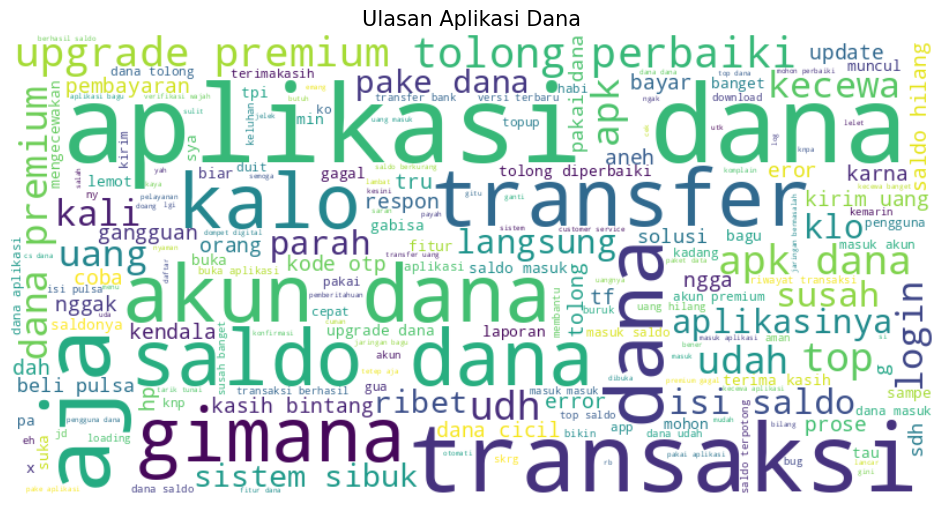

In [ ]:
all_text = " ".join(df['text_akhir'])

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis',
    max_words=200,
    contour_color='steelblue',
    contour_width=2
).generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Ulasan Aplikasi Dana", fontsize=15)
plt.show()

Berdasarkan visualisasi word cloud diatas, terlihat bahwa pengguna sering membahas fitur transaksi, saldo, dan akun, namun juga ada beberapa keluhan tentang error, gangguan, transaksi, dan login. Hal ini bisa menjadi masukan bagi pengembang aplikasi Dana untuk meningkatkan pengalaman pengguna, terutama dalam transaksi dan akses akun.